In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
metrics = pd.read_csv('../data/sector_metrics.csv', index_col=0)
X = metrics[['Volatility', 'Sharpe', 'Beta', 'MaxDrawdown']].drop('SPY')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

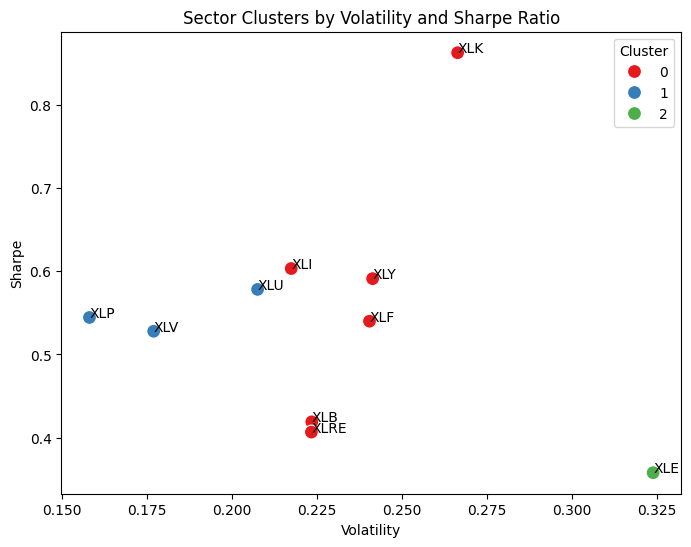

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Volatility'], y=X['Sharpe'], hue=X['Cluster'], palette='Set1', s=100)
for i, txt in enumerate(X.index):
    plt.annotate(txt, (X['Volatility'].iloc[i], X['Sharpe'].iloc[i]))
plt.title("Sector Clusters by Volatility and Sharpe Ratio")
plt.show()

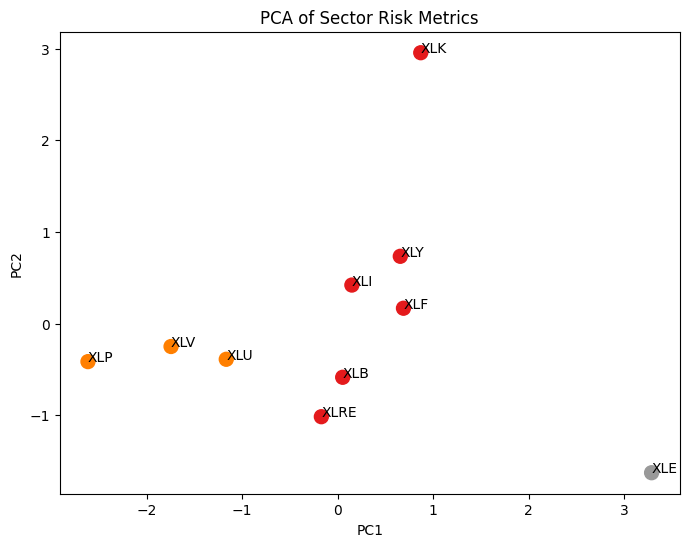

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Set1', s=100)
for i, txt in enumerate(X.index):
    plt.annotate(txt, (X_pca[i,0], X_pca[i,1]))
plt.title("PCA of Sector Risk Metrics")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()